In [1]:
import torch
import torch.nn as nn
import math

In [ ]:
"""
GAN to generate pair of points (x,y) belonging to y = sin(x)
"""

In [2]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:,0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

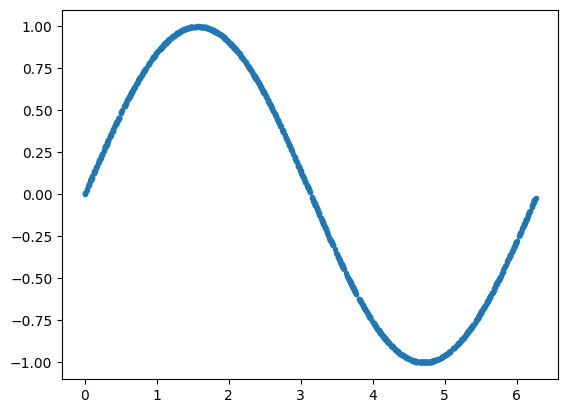

In [3]:
import matplotlib.pyplot as plt

plt.plot(train_data[:,0], train_data[:,1], ".")
plt.show()

In [4]:
# generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,16,bias=True),
            nn.ReLU(),
            nn.Linear(16,32,bias=True),
            nn.ReLU(),
            nn.Linear(32,2,bias=True)
        )
    def forward(self, x):
        return self.model(x)
    

# discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,128,bias=True),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,64,bias=True),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64,32,bias=True),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32,1,bias=True),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [14]:
generator = Generator()
discriminator = Discriminator()

In [15]:
optim_gen = torch.optim.Adam(generator.parameters(), lr=0.001)
optim_disc = torch.optim.Adam(discriminator.parameters(), lr=0.001)

In [16]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [17]:
epochs = 100
loss_func = nn.BCELoss()

for epoch in range(epochs):
    for batch, (real_samples, _) in enumerate(train_loader):
        real_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        latent_space_labels = torch.zeros((batch_size,1))
        samples = torch.cat((real_samples, generated_samples))
        labels = torch.cat((real_labels, latent_space_labels))

        # train discriminator
        discriminator.zero_grad()
        discriminated_labels = discriminator(samples)
        disc_loss = loss_func(discriminated_labels, labels)
        disc_loss.backward()
        optim_disc.step()

        # train generator
        latent_space_samples = torch.randn((batch_size, 2))
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        discriminated_labels = discriminator(generated_samples)
        gen_loss = loss_func(discriminated_labels, real_labels)
        gen_loss.backward()
        optim_gen.step()

        if ((epoch%10==0) or (epoch==epochs-1)) and (batch == batch_size-1):
            print(f"Epoch {epoch}")
            print(f"generator loss - {gen_loss.item()}")
            print(f"discriminator loss - {disc_loss.item()}\n")

Epoch 0
generator loss - 0.923055112361908
discriminator loss - 0.32932963967323303

Epoch 10
generator loss - 0.854118824005127
discriminator loss - 0.63096022605896

Epoch 20
generator loss - 0.8469769954681396
discriminator loss - 0.6619937419891357

Epoch 30
generator loss - 0.825051486492157
discriminator loss - 0.6809050440788269

Epoch 40
generator loss - 0.8127827048301697
discriminator loss - 0.6854435205459595

Epoch 50
generator loss - 0.7504191398620605
discriminator loss - 0.6703338027000427

Epoch 60
generator loss - 0.7156325578689575
discriminator loss - 0.635327160358429

Epoch 70
generator loss - 0.8159812092781067
discriminator loss - 0.666476845741272

Epoch 80
generator loss - 0.7921979427337646
discriminator loss - 0.6390395760536194

Epoch 90
generator loss - 0.7009544372558594
discriminator loss - 0.583665132522583

Epoch 99
generator loss - 0.6842896342277527
discriminator loss - 0.6930513978004456



### generating samples

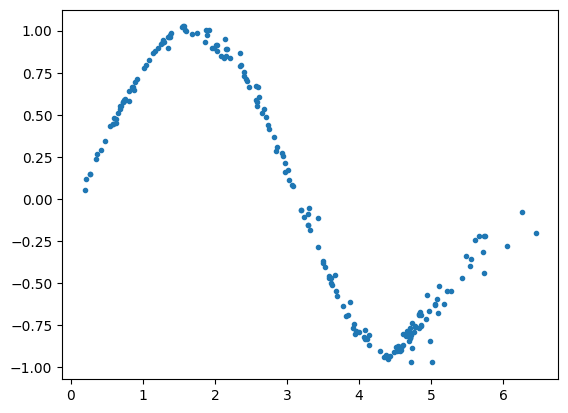

In [20]:
# generating 200 samples from the trained generator

random_noise = torch.randn((200, 2))
generator.eval()
generated_samples = generator(random_noise).detach()

plt.plot(generated_samples[:,0], generated_samples[:,1], ".")
plt.show()

In [ ]:
"""
distribution of the generated output from random initial points in the latent space almost follows the distribution of the real samples.
"""